In [1]:
#Import the necessary libraries for the file
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import numpy as np

data = pd.read_csv('data/dermatology.csv')

In [2]:
data

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,ES class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
353,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
354,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
355,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
data.shape

(357, 35)

In [4]:
class_names = ["psoriasis", "seboreic dermatitis", "lichen planus", "pityriasis rosea", "cronic dermatitis", "pityriasis rubra pilaris"]
n_features = data.shape[1]-1

In [5]:
#Split the dataset to train the algorithms

from sklearn.model_selection import train_test_split
X_es = data.iloc[:,:-1]
y_es = data.loc[:,"ES class"]

X_train, X_test, y_train, y_test = train_test_split(X_es, y_es, random_state=0)

# **Linear models**

## Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, max_iter=610).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.978


In [7]:
print("Coefficient shape: ", logreg.coef_.shape)
print("Intercept shape: ", logreg.intercept_.shape)

Coefficient shape:  (6, 34)
Intercept shape:  (6,)


Text(0, 0.5, 'Coefficient magnitude')

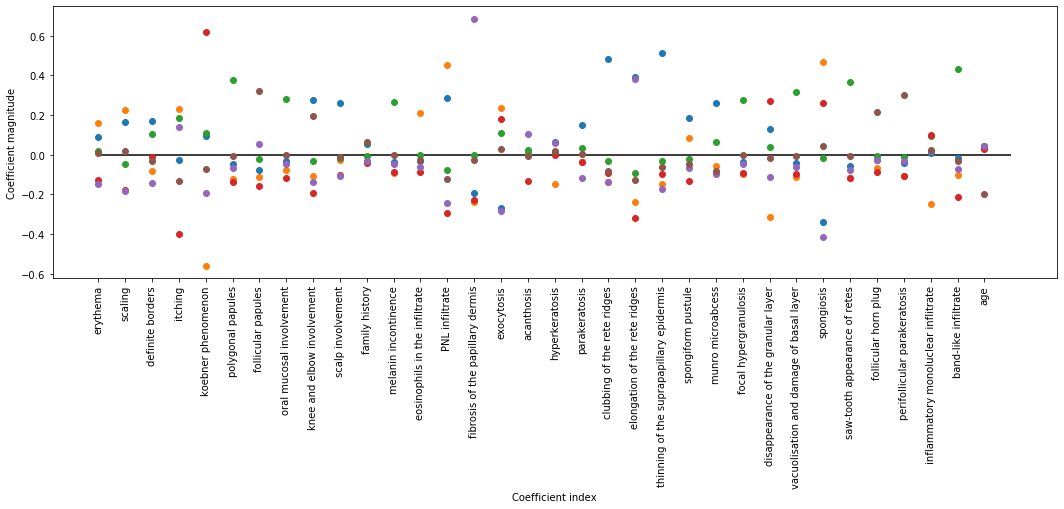

In [8]:
plt.figure(figsize=(18, 5))
plt.plot(logreg.coef_.T, 'o')
plt.xticks(range(n_features), logreg.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

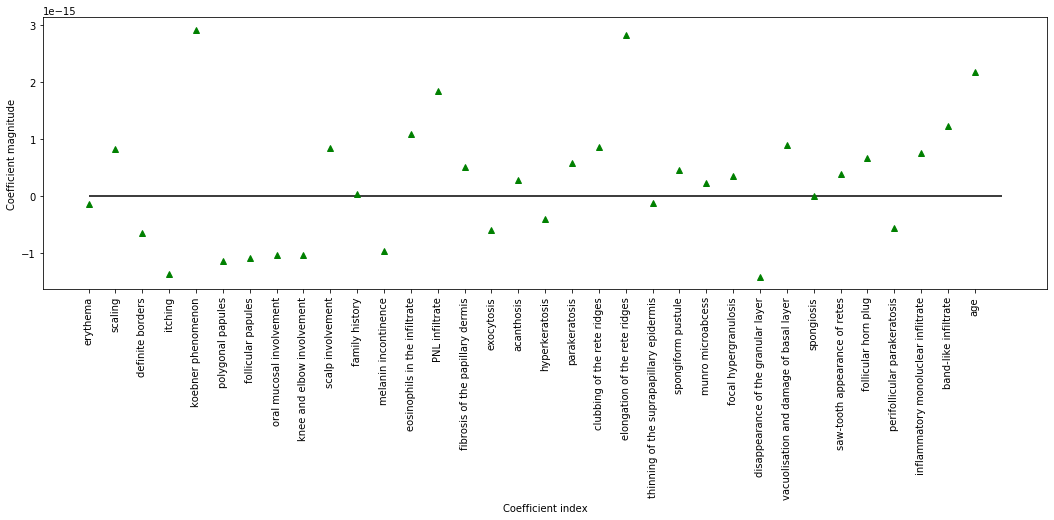

In [9]:
average_fields_logreg=[]
for feature in logreg.coef_.T:
    average_fields_logreg.append(sum(feature) / 6)

plt.figure(figsize=(18, 5))
plt.plot(average_fields_logreg, 'g^')
plt.xticks(range(n_features), logreg.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

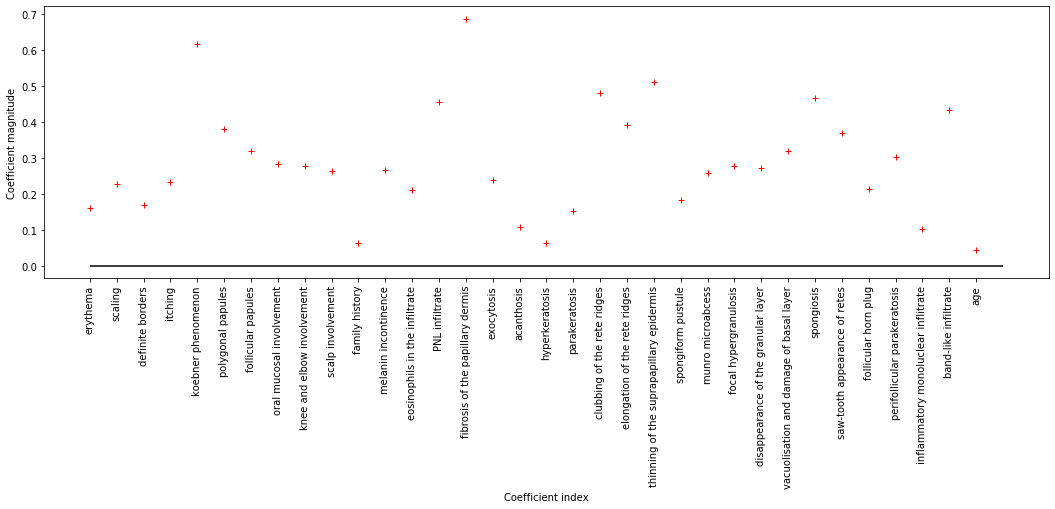

In [10]:
max_fields_logreg=[]
for feature in logreg.coef_.T:
    max_fields_logreg.append(max(feature))

plt.figure(figsize=(18, 5))
plt.plot(max_fields_logreg, 'r+')
plt.xticks(range(n_features), logreg.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear SVC

In [11]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C=0.005).fit(X_train, y_train)

print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

Training set score: 0.978
Test set score: 0.978


In [12]:
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (6, 34)
Intercept shape:  (6,)


Text(0, 0.5, 'Coefficient magnitude')

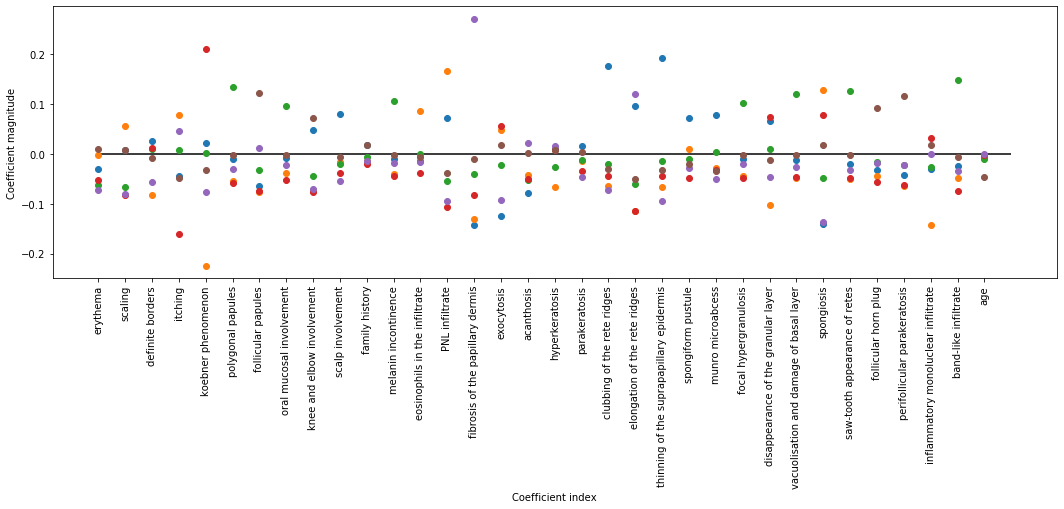

In [13]:
plt.figure(figsize=(18, 5))
plt.plot(linear_svm.coef_.T, 'o')
plt.xticks(range(n_features), linear_svm.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

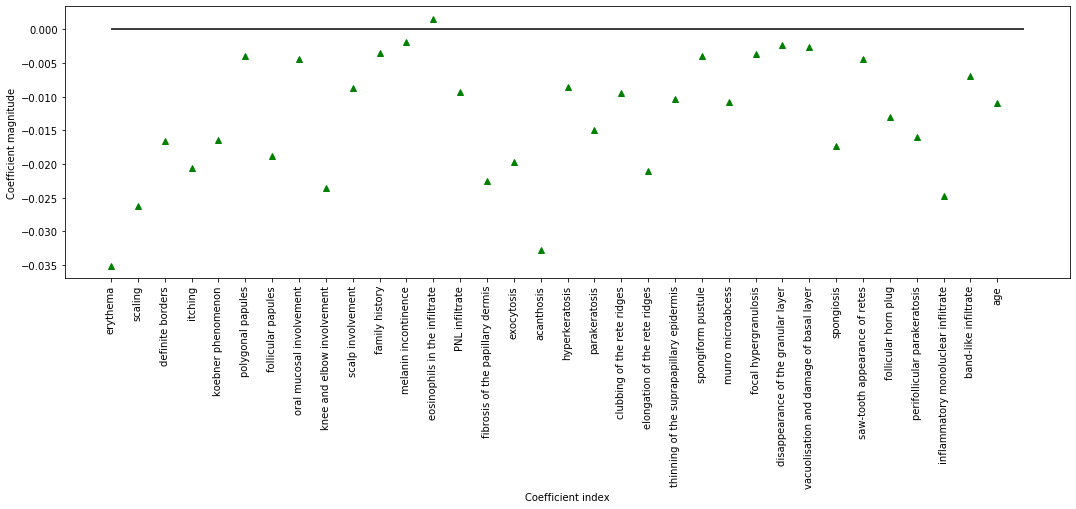

In [14]:
average_fields_svm=[]
for feature in linear_svm.coef_.T:
    average_fields_svm.append(sum(feature) / 6)

plt.figure(figsize=(18, 5))
plt.plot(average_fields_svm, 'g^')
plt.xticks(range(n_features), linear_svm.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

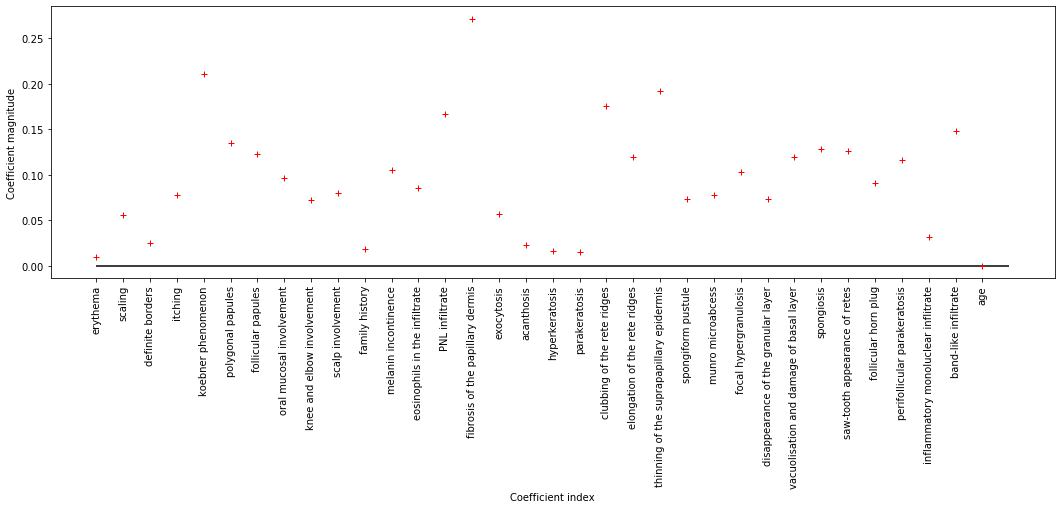

In [15]:
max_fields_svm=[]
for feature in linear_svm.coef_.T:
    max_fields_svm.append(max(feature))

plt.figure(figsize=(18, 5))
plt.plot(max_fields_svm, 'r+')
plt.xticks(range(n_features), linear_svm.feature_names_in_, rotation=90)
plt.hlines(0, 0, n_features)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# **Trees**

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.933


In [17]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=class_names,
 feature_names=tree.feature_names_in_, impurity=False, filled=True)

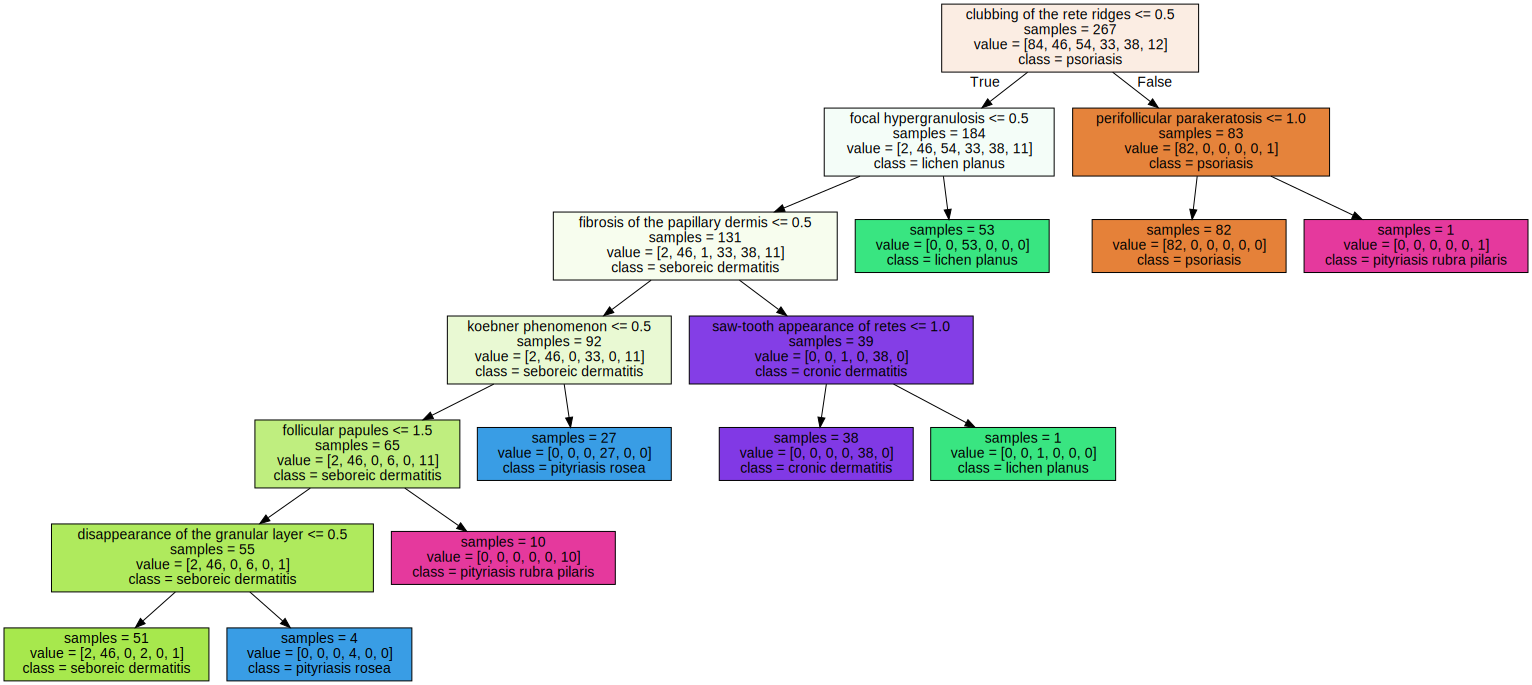

In [18]:
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

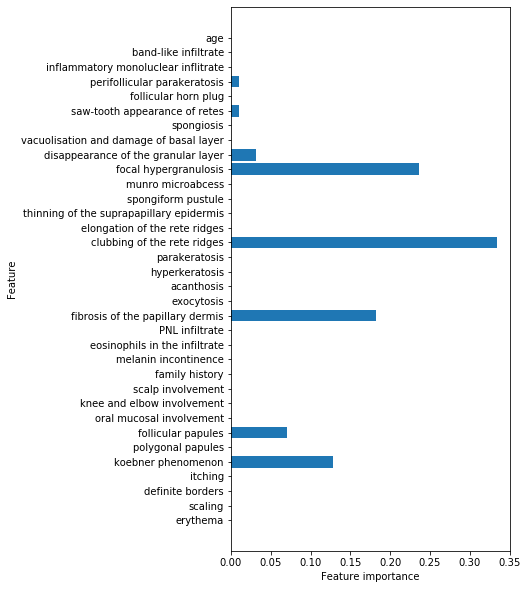

In [50]:
def plot_feature_importances(model):
 plt.figure(figsize=(5, 10))
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), tree.feature_names_in_)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances(tree)

## Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=8, max_depth=6, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.956


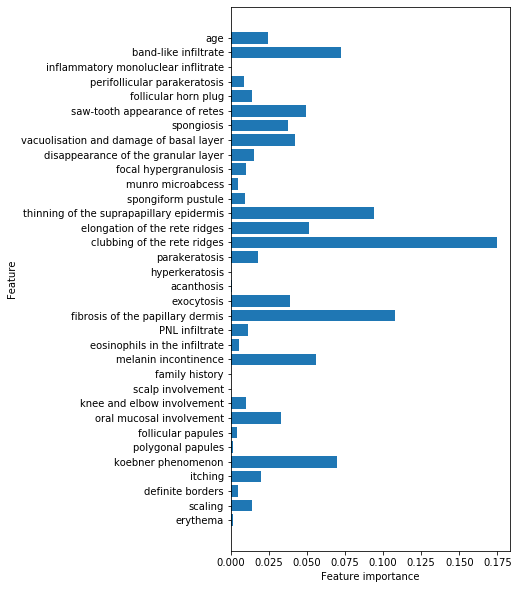

In [68]:
plot_feature_importances(forest)

## Gradient boosted regression trees

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


# **Neural Networks**

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10], max_iter=740)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.956
